# Práctica 5: BFS
## Edwin Axel Vizuet Gil
### Objetivo

La siguiente práctica consiste en un programa elaborado en Python, el cual recorrerá un gráfico creado en un diccionario, almacenando el recorrido, indicando los caminos que tomó mediante busqueda BFS.

A diferencia de DFS; este método expande todo el árbol encontrando todas las rutas posibles dentro del gráfico. 

### Desarrollo
Los siguientes códigos (BFSGraph1.py, BFSGraph2.py, BFSGraph3.py) contiene la creación de los gráficos a recorrer mediante un diccionario:

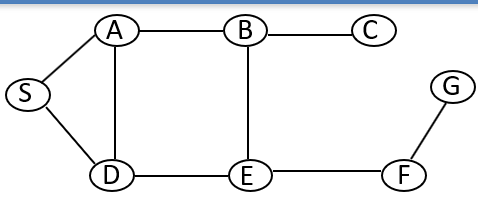

In [2]:
from IPython.core.display import Image
Image(filename ='/Users/AxelVizGil/Documents/Escuela/11vo_Cuatri/IA/S_to_G.png',width=400)

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 17 10:34:11 2018

@author: jlblancas
"""
conexion = {}

conexion['A'] = {'B', 'G'}
conexion['B'] = {'C', 'F'}
conexion['C'] = {'E'}
conexion['D'] = {'E'}
conexion['E'] = {'D', 'I'}
conexion['F'] = {'G'}
conexion['G'] = {'F'}
conexion['H'] = {'I'}
conexion['I'] = {'H', 'J', 'K'}
conexion['J'] = {'F'}
conexion['K'] = {'I'}

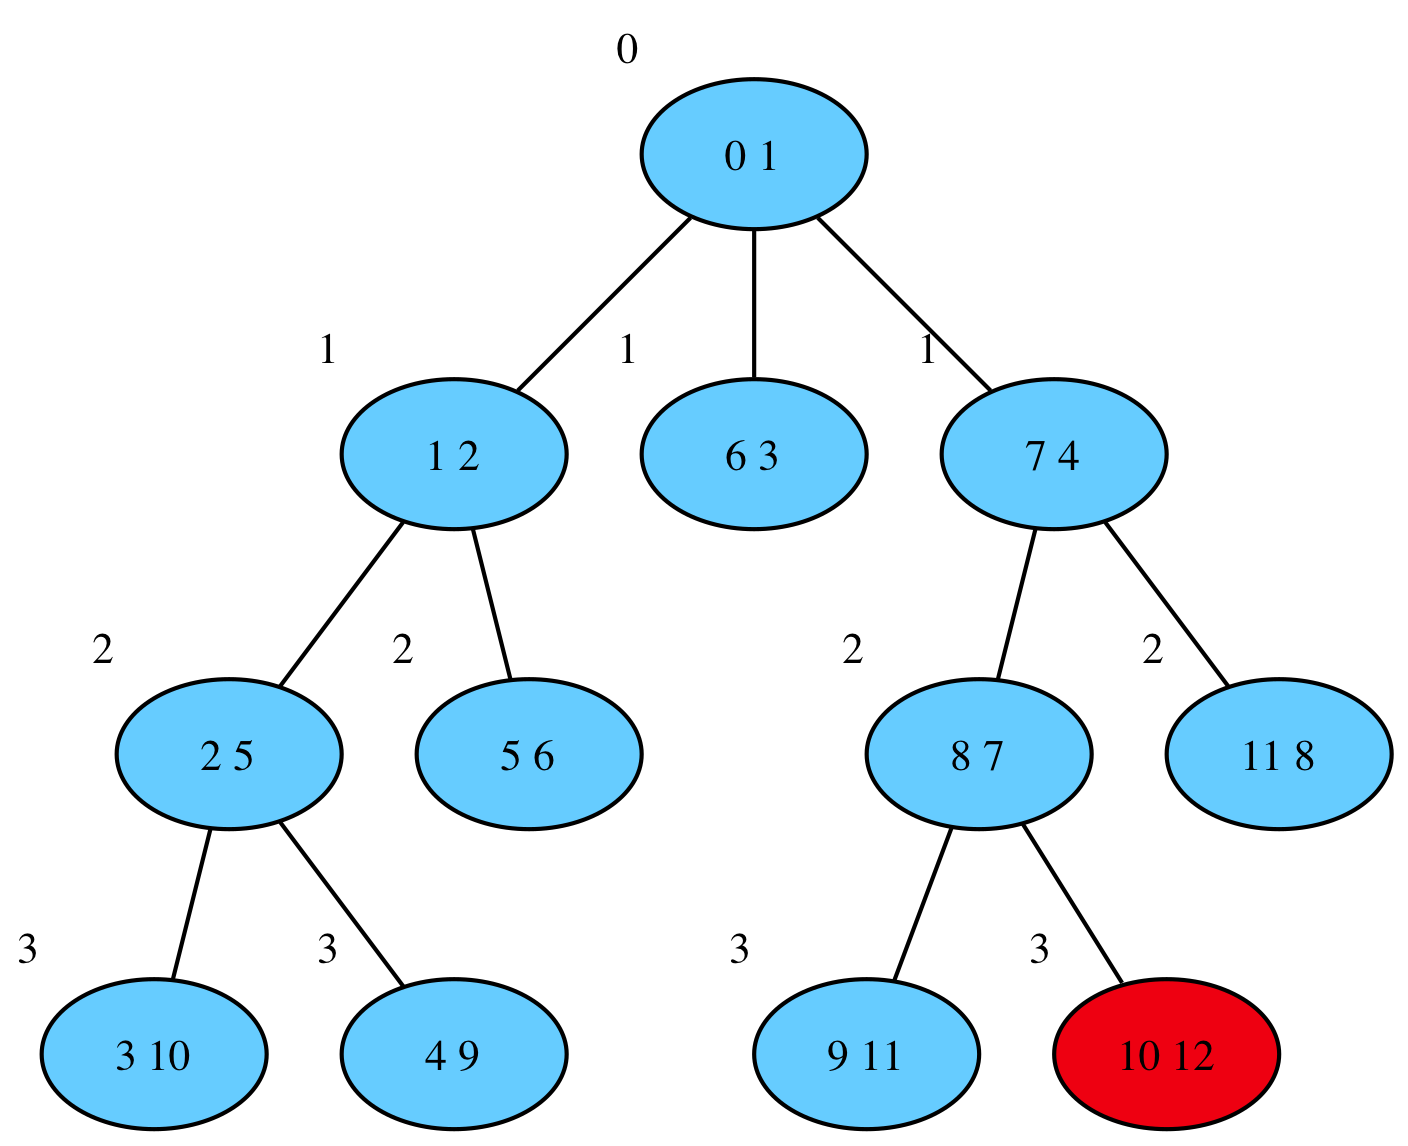

In [3]:
from IPython.core.display import Image
Image(filename ='D:/IA/1er Parcial/NodosBFS/BFSgraf2.png',width=400)

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 25 18:36:54 2019

@author: Unitec
"""

conexion = {}

conexion["1"]={"2","3","4"}
conexion["2"]={"5","6"}
conexion["3"]={"1"}
conexion["5"]={"9","10"}
conexion["6"]={"1"}
conexion["4"]={"7","8"}
conexion["7"]={"11","12"}
conexion["8"]={"1"}
conexion["9"]={"1"}
conexion["10"]={"1"}
conexion["11"]={"1"}
conexion["12"]={"1"}

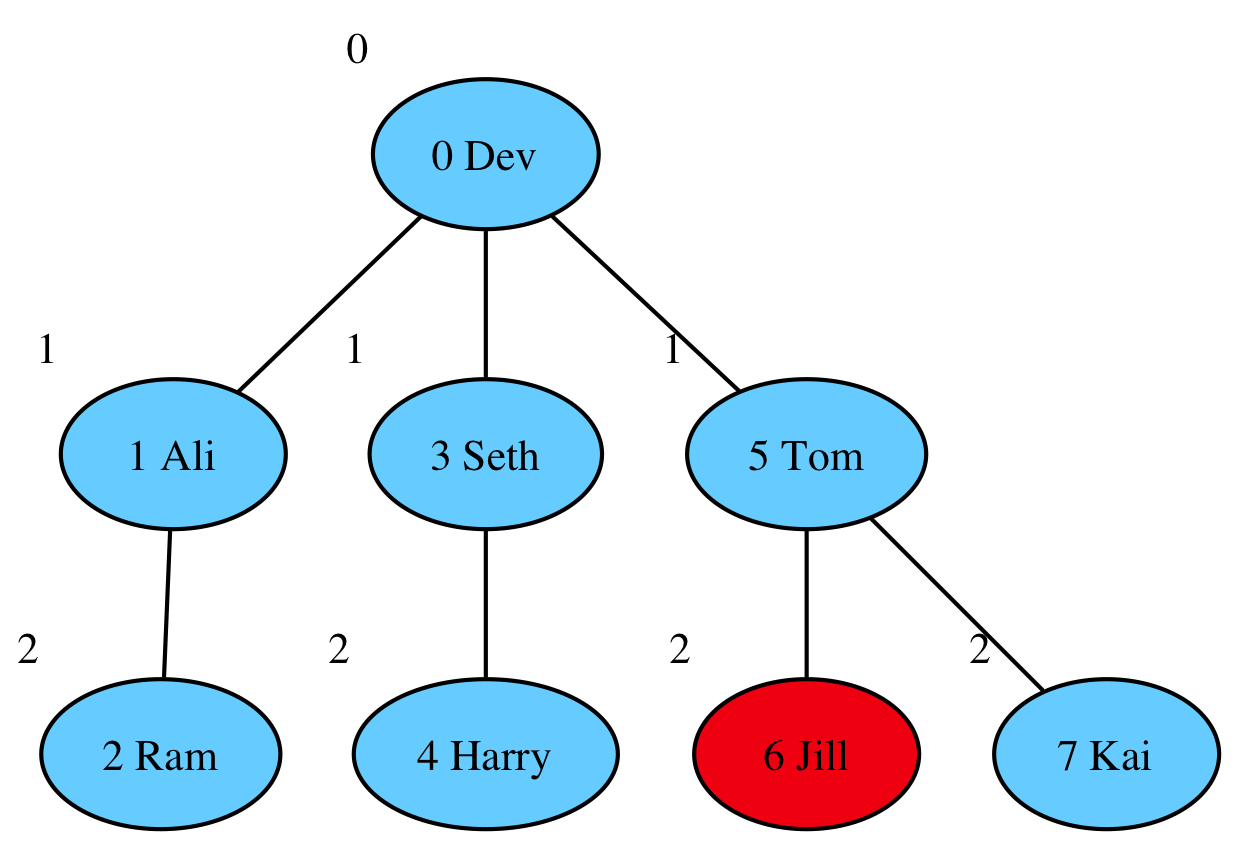

In [4]:
from IPython.core.display import Image
Image(filename ='D:/IA/1er Parcial/NodosBFS/BFSgraf3.png',width=400)

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 17 10:34:11 2018

@author: jlblancas
"""
conexion = {}
conexion["Dev"] = {"Ali", "Seth", "Tom"}
conexion["Ali"] = {"Dev", "Seth", "Ram"}
conexion["Seth"] = {"Ali", "Tom", "Harry"}
conexion["Tom"] = {"Dev", "Seth", "Kai", 'Jill'}
conexion["Ram"] = {"Ali", "Jill"}
conexion["Kai"] = {"Tom"}
conexion["Mary"] = {"Jill"}
conexion["Harry"] = {"Seth"}
conexion["Jill"] = {"Ram", "Tom", "Mary"}

En dicho código, se crea un diccionario el cual contiene los nodos (lugares) que serán recorridos por el programa.

A continuación, se usan las clases Nodos y Estados para poder crear los objetos (instancias) correspondientes para almacenar los lugares y poder realizar el recorrido.

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 17 11:46:02 2018

@author: jlblancas
"""

class Nodo:
    '''
    This class represents a node in the search tree
    '''
    
    def __init__(self, estado):
        """
        Constructor
        """
        self.estado = estado
        self.profundidad = 0
        self.hijos = []
        self.padre = None
        self.limite = True
        
        
    def agregaHijos(self, nodoHijo):
        """
        This method adds a node under another node
        """
        self.hijos.append(nodoHijo)
        nodoHijo.padre = self
        nodoHijo.profundidad = self.profundidad + 1
        
    
    def imprimeArbol(self):
        """
        This method prints the tree
        """
        print(self.profundidad , " - " , self.estado.nombre)
        for hijo in self.hijos:
            hijo.imprimeArbol()
 
    
    def imprimeRuta(self):
        """
        This method prints the path from initial state to goal state
        """
        if self.padre != None:
            self.padre.imprimeRuta()
        print("-> ", self.estado.nombre)

En la clase Nodos, se ocupan los atributos y métodos correspondientes para poder crear los nodos correspondientes, así mismo, conforme se realice el recorrido se crearán los hijos dependiento al gráfico cargado, cabe recordar que este código va desplegando todos los hijos de cada nodo padre, sin importar si es la solución o no, debido a que así se comporta el método de busqueda BFS.

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 17 12:03:18 2018

@author: jlblancas
"""

from BFSgraf2 import conexion
from collections import OrderedDict

class Estado:
    '''
    This class retrieves state information for social connection feature
    '''
    
    def __init__(self, nombre = None):
        if nombre == None:
            #create initial state
            self.nombre = self.estadoInicial()
        else:
            self.nombre = nombre
    
    def estadoInicial(self):
        """
        This method returns me.
        """
        estadoInicial = "1"
        return estadoInicial


    def funcionSucesora(self):
        """
        This is the successor function. It finds all the persons connected to the
        current person
        """
        dictemp = {}
        dictemp = conexion[self.nombre]
        stack1 = list(dictemp)
        stack1.sort()
        dictofWords2 = OrderedDict()
        for i in range(0,len(stack1)):
            dictofWords2[stack1[i]] = i+1
        print(dictofWords2.keys())
        return dictofWords2.keys()
        
        
        
        
    def checarMeta(self):
        """
        Este metodo checa si la meta es G
        """ 
        #check if the person's name is Jill
        return self.nombre == '12'

ModuleNotFoundError: No module named 'BFSgraf2'

En este código (Estados), se contienen los métodos correspondientes los cuales identificaran los lugares en los que están posicionados los nodos según el gráfico. La función sucesora es de los métodos más importantes, debido a que regresa los hijos del nodo actual.
Se tienen aquellas mejoras en contra de DFS.

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 17 20:20:57 2018

@author: jlblancas
"""


from Nodob import Nodo
from Estadob import Estado
from collections import deque



def ejecutaBFS():
    """
    This function performs BFS search using a queue
    """
    #create queue
    queue = deque([])
    
    #since it is a graph, we create visited list
    visitados = []
    
    #create root node
    estadoInicial = Estado()
    raiz = Nodo(estadoInicial)
    #add to queue and visited list
    queue.append(raiz)    
    visitados.append(raiz.estado.nombre)
    
    # check if there is something in queue to dequeue
    while len(queue) > 0:
        
        #get first item in queue
        nodoActual = queue.popleft()
        
        print("-- dequeue --", nodoActual.estado.nombre)
        
        #check if this is goal state
        if nodoActual.estado.checarMeta():
            print("Meta Alcanzada")
            #print the path
            print("----------------------")
            print("Ruta")
            nodoActual.imprimeRuta()
            break
            
        #get the child nodes 
        estadosHijos = nodoActual.estado.funcionSucesora()
        for estadoHijo in estadosHijos:
            
            nodoHijo = Nodo(Estado(estadoHijo))
            
            #check if node is not visited
            if nodoHijo.estado.nombre not in visitados:
                
                #add this node to visited nodes
                visitados.append(nodoHijo.estado.nombre)
                
                #add to tree and queue
                nodoActual.agregaHijos(nodoHijo)
                queue.append(nodoHijo) 
            
    #print tree
    print("----------------------")
    print("Arbol")
    raiz.imprimeArbol()
    
ejecutaBFS()

ModuleNotFoundError: No module named 'Nodob'

### Conclusión


BFS es un método de búsqueda más completo, pero tiene algunas desventajas:

+ No se debe de agregar los nodos padres como hijos, de lo contrario, igual caería en un ciclo infinito.
+ Es completo, sin embargo, es óptimo solamente si el costo no está en función de la profundidad de la ruta.
+ BFS es peor en el uso de memoría, debido a que carga todo el árbol.